In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import ks_2samp
import glob
import random
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
def KS_Test(data_1, data_2, alpha=0.05, just_return_result=False, long_KS_box=False):

    c_of_alpha = np.sqrt(  np.log(2/alpha)  /  2  )

    if just_return_result == False:

        D = c_of_alpha * np.sqrt( (len(data_1)+len(data_2)) / (len(data_1)*len(data_2)) )
        test_result = ks_2samp(data_1, data_2)
        statistic = test_result[0]
        p_value = test_result[1]

        print(test_result)
        print(f'Critical D-Value = {np.round(D, 3)}')
        print()

        if statistic <= D:
            print(f'{np.round(statistic, 3)} < {np.round(D, 3)}   ==>  Hypothesis is accepted !')

        elif statistic > D:
            print(f'{np.round(statistic, 3)} > {np.round(D, 3)}   ==>  Hypothesis is rejected !')

In [2]:
#hpath = '/media/bartosz/Volume/highz_data/'
#dpath = '/media/bartosz/Volume/BOSS_DR14/'

hpath = '/media/bartosz/USB STICK/highz_data/'
dpath = '/media/bartosz/USB STICK/BOSS_DR14_ext/'

# Exclude:
exc = ['J1535+1943','PSOJ215.1514-16.0417','ULASJ0148+0600','ULASJ1207+0630','VIKJ2318-3029','PSOJ183-12']

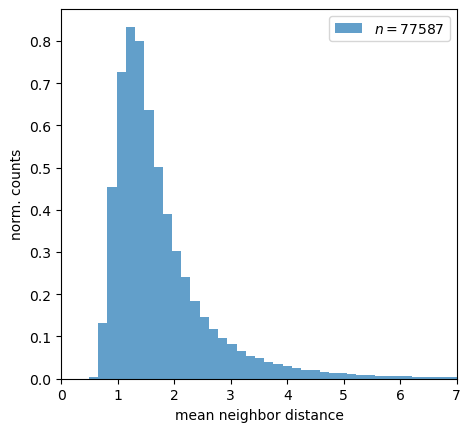

0.6249510413738993

In [17]:
##### Neighbor distance distribution #####

# eboss spectra
nnfile = np.loadtxt(dpath + 'nearest_neighbors_PLcorr.txt',dtype='str')
nn_id = nnfile[:,0]
nn_Ds = nnfile[:,8:]
d_means = [np.mean([float(j) for j in nn]) for nn in nn_Ds]

# eboss spectra PL uncorrected
# nnfile_uncorr = np.loadtxt('/media/bartosz/USB STICK/BOSS_DR14/' + 'nearest_neighbors_snr10.txt',dtype='str')
nnfile_uncorr = np.loadtxt(dpath + 'nearest_neighbors_PLuncorr.txt',dtype='str')
nn_id_uncorr = nnfile_uncorr[:,0]
nn_Ds_uncorr = nnfile_uncorr[:,8:]
d_means_uncorr = [np.mean([float(j) for j in nn]) for nn in nn_Ds_uncorr]

# sort average distances
sort_index = np.argsort(d_means)
idx_sorted = nn_id[sort_index]
dmean_sorted = np.sort(d_means)
dmean_sorted = dmean_sorted[:-200]       # Exclude 'weird' quasars (BAL, red,...)

# sort average distances
sort_index_uncorr = np.argsort(d_means_uncorr)
idx_sorted_uncorr = nn_id[sort_index_uncorr]
dmean_sorted_uncorr = np.sort(d_means_uncorr)
dmean_sorted_uncorr = dmean_sorted_uncorr[:-200]       # Exclude 'weird' quasars (BAL, red,...)

# high z spectra
hnnfile = np.loadtxt(hpath + 'highZ_NN_corr_lbol10%.txt',dtype='str')
# hnnfile = np.loadtxt(hpath + 'highZ_NN_ext_plclbound.txt',dtype='str')
hnn_id = hnnfile[:,0]
hnn_Ds = hnnfile[:,6:]
hd_means = np.array([np.mean([float(j) for j in nn]) for nn in hnn_Ds])
# Exclude BAL and reddened quasars
filter = np.array([x in exc for x in hnn_id])
hnn_id = hnn_id[~filter]
hnn_Ds = hnn_Ds[~filter]
hd_means = hd_means[~filter]

# sort average distances
hsort_index = np.argsort(hd_means)
hidx_sorted = hnn_id[hsort_index]
hdmean_sorted = np.sort(hd_means)

# # calculate probability of d_N being drawn from KDE
# p=[]
# kernel = gaussian_kde(dmean_sorted, bw_method='scott')
# for i, id in enumerate(hnn_id):    
#     d = hd_means[i]
#     prob = kernel.integrate_box_1d(d,np.inf)
#     p.append(prob)
# p_sorted = np.array(sorted(p,reverse=True))

# plot histogram
# plt.rcParams.update({'font.size': 14})
bins = np.linspace(0, 8, 50)
fig, ax = plt.subplots()
fig.set_figwidth(5.1)
ax.hist(dmean_sorted,bins,density=True,alpha=0.7,color='tab:blue',label='$n={}$'.format(len(dmean_sorted)))
# ax.hist(dmean_sorted_uncorr,bins,density=True,alpha=0.7,color='tab:green',label='$n={}$'.format(len(dmean_sorted_uncorr)))
#cnts, values, bars =ax.hist(hd_means,bins,density=True,alpha=0.7,edgecolor='grey',label='$n={}$'.format(len(hdmean_sorted)))

# # # Define the colormap and normalization
# # cmap = plt.cm.Reds
# # norm = plt.Normalize(vmin=min(p_sorted), vmax=max(p_sorted))

# # for i, (cnt, c, bar) in enumerate(zip(cnts, p_sorted, bars)):
# #     bar.set_facecolor(cmap(norm(c)))

# # # Add a colorbar
# # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# # sm.set_array([])  # Dummy array for colorbar
# # cbar = plt.colorbar(sm, ax=ax)
# # cbar.set_label(r'$P_\text{eBOSS}$')

plt.xlabel('mean neighbor distance')
plt.ylabel('norm. counts')


# Kernel Density Estimation
# eBOSS
kernel = gaussian_kde(dmean_sorted, bw_method=0.05)
y = kernel.pdf(np.linspace(0,8,500))
# plt.plot(np.linspace(0,8,500),y,color='blue',label='KDE eBOSS')
plt.xlim(0,7)
plt.legend()
# plt.savefig('plots/GalaxyCoffee/distr_eboss_highz_eg.png',bbox_inches='tight')
plt.show()

kernel.integrate_box_1d(1,2)

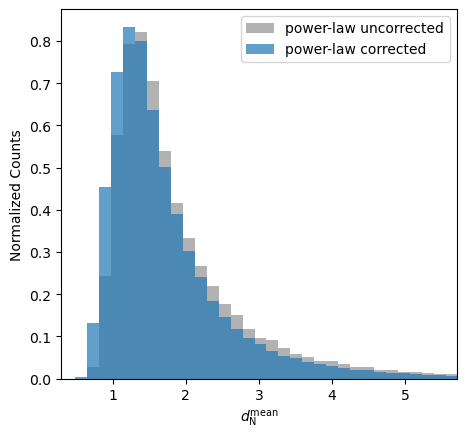

In [20]:
fig, ax = plt.subplots()
fig.set_figwidth(5.1)
fig.set_figheight(4.8)

bins = np.linspace(0, 8, 50)
cnts_uncorr, values_uncorr, bars_uncorr = ax.hist(dmean_sorted_uncorr[:-200], bins, color='grey',edgecolor='None',linewidth=1, 
                                                  histtype='stepfilled',density=True, alpha=0.6, label='power-law uncorrected')
cnts, values, bars = ax.hist(dmean_sorted[:-200], bins, color='tab:blue',edgecolor='None',linewidth=1, 
                                                  histtype='stepfilled',density=True, alpha=0.7, label='power-law corrected')

plt.xlabel(r'$d_\text{N}^\text{mean}$')
plt.ylabel('Normalized Counts')


# Kernel Density Estimation
# eBOSS
# kernel = gaussian_kde(dmean_sorted, bw_method=0.05)
# y = kernel.pdf(np.linspace(0,8,500))
# plt.plot(np.linspace(0,8,500),y,color='blue',label='KDE eBOSS')
plt.xlim(0.3,5.7)
plt.legend()
plt.savefig('plots/statistics/distr_eboss.pdf',bbox_inches='tight')
plt.show()

In [18]:
meta_data = np.loadtxt(hpath + 'meta_data_v2.txt', dtype='str')
names = meta_data[:,0]
# Exclude BAL and reddened quasars
filter2 = np.array([x in exc for x in names])
names = names[~filter2]
names

array(['ATLASJ025.6821-33.4627', 'CFHQSJ1509-1749', 'PSOJ036+03',
       'SDSSJ0100+2802', 'SDSSJ0818+1722', 'SDSSJ0836+0054',
       'SDSSJ0927+2001', 'SDSSJ1030+0524', 'SDSSJ1306+0356',
       'ULASJ1319+0950', 'J0108+0711', 'J1335-0328', 'J2100-1715',
       'J2207-0416', 'PSOJ004+17', 'PSOJ011+09', 'PSOJ056-16',
       'PSOJ159-02', 'PSOJ308-21', 'PSOJ340-18', 'VDESJ0330-4025',
       'VIKJ0046-2837', 'PSOJ060+24', 'PSOJ242-12', 'PSOJ308-27',
       'PSOJ359-06', 'J1212+0505', 'PSOJ025-11', 'PSOJ217-16',
       'VDESJ0224-4711', 'PSOJ158-14', 'PSOJ029-29', 'PSOJ323+12',
       'ATLASJ029.9915-36.5658'], dtype='<U22')

In [22]:
# plt.rcParams.update({'font.size': 16})
from scipy import stats
# plt.rcParams.update({'font.size': 16})

# high z spectra
hnnfile = np.loadtxt(hpath + 'highZ_NN_corr_lbol10%.txt',dtype='str')
hnn_id = hnnfile[:,0]
hnn_Ds = hnnfile[:,6:]
hd_means = np.array([np.mean([float(j) for j in nn]) for nn in hnn_Ds])
# Exclude BAL and reddened quasars
filter = np.array([x in exc for x in hnn_id])
hnn_id = hnn_id[~filter]
hnn_Ds = hnn_Ds[~filter]
hd_means = hd_means[~filter]

pvalue=[]
# pp = PdfPages('plots/NN_distributions.pdf')
for n in names:
    dmean_trim = np.loadtxt('/media/bartosz/USB STICK/highz_data/eBOSS_NN_trim/pl_corr/{}_NN.txt'.format(n))[:,1]
    dmean_trim = np.sort(dmean_trim)[:-200]       # Exclude 'weird' quasars (BAL, red,...)

    # Kernel Density Estimation
    # eBOSS
    kernel = gaussian_kde(dmean_trim, bw_method=0.05)

    # highz index
    index = np.where(hnn_id == n)

    # highz distance
    d = hd_means[index[0][0]]
    prob = kernel.integrate_box_1d(d,np.inf)

    pvalue.append(prob)
    std = np.std(dmean_trim)
    mean = np.mean(dmean_trim)
    sigma = (d-mean)/std
    print(prob)
    continue
    
    # plot histogram
    bins = np.linspace(0.5, 6.5, 50)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.hist(dmean_trim,bins,density=True,alpha=0.7,color='tab:blue',label='$n={}$'.format(len(dmean_trim)))

    y = kernel.pdf(np.linspace(0.5,6.5,500))
    plt.plot(np.linspace(0.5,6.5,500),y,color='blue')
    
    linemax = kernel.pdf(d)[0]/0.95
    ax.axvline(d,ymax=linemax,color='red',label=r'$d_\text{{N}}^\text{{mean}}={:.2f}$'.format(d))
    x=np.linspace(0.5,6.5,500)
    plt.fill_between(x, y, where=(x > d), color='red', hatch='\\', alpha=0.3, label='$P={:.3f}$'.format(prob))
    plt.ylim(0,0.95)
    plt.legend()
    plt.title(n)
    plt.xlabel(r'$d_\text{N}^\text{mean}$')
    plt.ylabel('Normalized Counts')
    # plt.savefig('plots/statistics/qso histograms Lmatched/{}.pdf'.format(n),bbox_inches='tight')
    # pp.savefig(fig)
    plt.show()
    plt.close()
# pp.close()

0.6738312470879193
0.7089595179286073
0.7548054248701218
0.9417259106639457
0.7057113171792009
0.39321141826361644
0.8078211427348775
0.38378269612563953
0.8555902928856204
0.9070867778791296
0.5757335624174023
0.7116716582741195
0.11899965612063323
0.282321888909203
0.3365585523787619
0.23091100205670015
0.08149035307883437
0.14641203067097555
0.21474075723834274
0.10609409502363709
0.5077353183463567
0.07960085355706306
0.1609220791671046
0.249187311167655
0.25337075711317364
0.09061414816304036
0.6749787499914521
0.34442662568515847
0.279149435074376
0.07471183838522914
0.30545979516440974
0.7124270064955687
0.18055586968039297
0.6895789599908321


In [21]:
np.log10(np.prod(pvalue))
names

array(['ATLASJ025.6821-33.4627', 'CFHQSJ1509-1749', 'PSOJ036+03',
       'SDSSJ0100+2802', 'SDSSJ0818+1722', 'SDSSJ0836+0054',
       'SDSSJ0927+2001', 'SDSSJ1030+0524', 'SDSSJ1306+0356',
       'ULASJ1319+0950', 'J0108+0711', 'J1335-0328', 'J2100-1715',
       'J2207-0416', 'PSOJ004+17', 'PSOJ011+09', 'PSOJ056-16',
       'PSOJ159-02', 'PSOJ308-21', 'PSOJ340-18', 'VDESJ0330-4025',
       'VIKJ0046-2837', 'PSOJ060+24', 'PSOJ242-12', 'PSOJ308-27',
       'PSOJ359-06', 'J1212+0505', 'PSOJ025-11', 'PSOJ217-16',
       'VDESJ0224-4711', 'PSOJ158-14', 'PSOJ029-29', 'PSOJ323+12',
       'ATLASJ029.9915-36.5658'], dtype='<U22')

In [13]:
N = 10000      # number of samples drawn
samples = dict()
print(samples)
for n in names:
    dmean_trim = np.loadtxt('/media/bartosz/USB STICK/highz_data/eBOSS_NN_trim/pl_corr/{}_NN.txt'.format(n))
    dmean_trim = dmean_trim[:,1]

    # Kernel Density Estimation
    # eBOSS
    kernel = gaussian_kde(dmean_trim, bw_method='scott')

    # Draw random sample
    sample = []
    for j in range(N):
        draw = random.choice(dmean_trim)
        prob = kernel.integrate_box_1d(draw,np.inf)
        sample.append(prob)
    samples['{}'.format(n)] = sample
    print(n, '- done')

{}
ATLASJ025.6821-33.4627 - done
CFHQSJ1509-1749 - done
PSOJ036+03 - done
SDSSJ0100+2802 - done
SDSSJ0818+1722 - done
SDSSJ0836+0054 - done
SDSSJ0927+2001 - done
SDSSJ1030+0524 - done
SDSSJ1306+0356 - done
ULASJ1319+0950 - done
J0108+0711 - done
J1335-0328 - done
J2100-1715 - done
J2207-0416 - done
PSOJ004+17 - done
PSOJ011+09 - done
PSOJ056-16 - done
PSOJ159-02 - done
PSOJ308-21 - done
PSOJ340-18 - done
VDESJ0330-4025 - done
VIKJ0046-2837 - done
PSOJ060+24 - done
PSOJ242-12 - done
PSOJ308-27 - done
PSOJ359-06 - done
J1212+0505 - done
PSOJ025-11 - done
PSOJ217-16 - done
VDESJ0224-4711 - done
PSOJ158-14 - done
PSOJ029-29 - done
PSOJ323+12 - done
ATLASJ029.9915-36.5658 - done


[0.08350537]


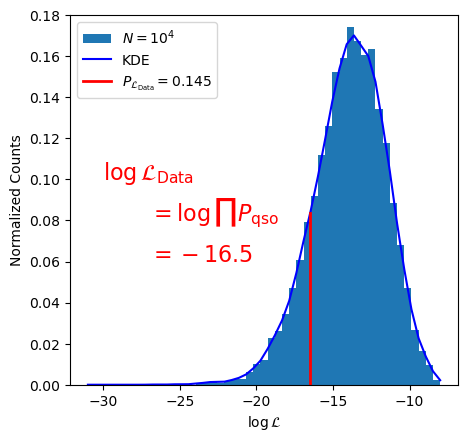

Data likelihood p-value:  0.14483300101040064


In [14]:
# plt.rcParams.update({'font.size': 16})
# plt.rcParams['text.usetex'] = True
# plt.rcParams.update(plt.rcParamsDefault)

# Data likelihood
L_d = np.prod(pvalue)


# Multiply corresponding elements using zip and a loop
s_pvalues = []
for values in zip(*samples.values()):
    s_pvalues.append(np.log10(np.prod(values)))

# bins = np.logspace(-30,-10,30)
bins = np.linspace(-31,-8,50)

kernel_lh = gaussian_kde(s_pvalues, bw_method='scott')
y = kernel_lh.pdf(bins)

# Calculate p-value for data likelihood 
p_L = kernel_lh.integrate_box_1d(-np.inf,np.log10(L_d))


fig, ax = plt.subplots()
fig.set_figwidth(5)
ax.hist(s_pvalues,bins,density=True,label=r'$N=10^{:.0f}$'.format(np.log10(N)))

ax.plot(bins,y,color='blue',label='KDE')
print(kernel_lh.pdf(np.log10(L_d)))
ax.axvline(np.log10(L_d), ymax=kernel_lh.pdf(np.log10(L_d))[0]/0.18,c='red',lw=2,label=r'$P_{{\mathcal{{L}}_\text{{Data}}}} = {:.3f}$'.format(p_L))

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r'$\log \mathcal{L}$')
ax.set_ylabel('Normalized Counts')

# handles, labels = ax.get_legend_handles_labels()
# custom_handles = [plt.Line2D([0], [0], color='red', linewidth=1)]
# custom_labels = [r'$\mathcal{L}_\text{Data} = {{.2f}}$'.format(p_L)]

# legend = ax.legend(custom_handles, custom_labels, loc='lower right', fontsize='small', title='# recovered neighbors')

plt.annotate(
    r'$\log{\mathcal{L}_\text{Data}}$',
    xy=(-30,0.1),
    color='red',
    fontsize=16,
)
plt.annotate(
    r'$ = \log{\prod P_\text{qso}}$',
    xy=(-27,0.08),
    color='red',
    fontsize=16,
)
plt.annotate(
    r'$ = {:.1f}$'.format(np.log10(L_d)),
    xy=(-27,0.06),
    color='red',
    fontsize=16,
)

plt.legend(loc='upper left')
plt.ylim(0,0.18)
# plt.savefig('plots/statistics/likelihoods_distr_{}_large.pdf'.format(N),bbox_inches='tight')
plt.show()

print('Data likelihood p-value: ', p_L) 

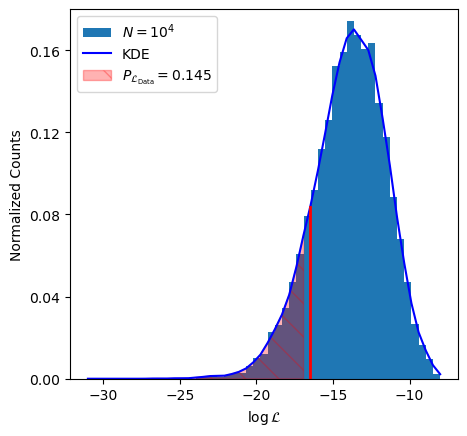

Data likelihood p-value:  0.14483300101040064


In [28]:
# plt.rcParams.update({'font.size': 14})
# Data likelihood calculation
L_d = np.prod(pvalue)

# Calculate log10 of the product of corresponding elements
s_pvalues = [np.log10(np.prod(values)) for values in zip(*samples.values())]

bins = np.linspace(-31, -8, 50)

# Kernel density estimation
kernel_lh = gaussian_kde(s_pvalues, bw_method='scott')
y = kernel_lh.pdf(bins)

# Calculate p-value for data likelihood
p_L = kernel_lh.integrate_box_1d(-np.inf, np.log10(L_d))

# Plotting
fig, ax = plt.subplots()
fig.set_figwidth(5)
ax.hist(s_pvalues, bins, density=True, label=r'$N=10^{:.0f}$'.format(np.log10(N)))

ax.plot(bins, y, color='blue', label='KDE')
ax.axvline(np.log10(L_d), ymax=kernel_lh.pdf(np.log10(L_d))[0] / 0.18, c='red', lw=2)#, 
    # label=r'$P_{{\mathcal{{L}}_\text{{Data}}}} = {:.3f}$'.format(p_L))

plt.fill_between(bins, y, where=(bins <= np.log10(L_d)), color='red', hatch='\\', alpha=0.3, 
                 label=r'$P_{{\mathcal{{L}}_\text{{Data}}}} = {:.3f}$'.format(p_L))


ax.set_xlabel(r'$\log \mathcal{L}$')
ax.set_ylabel('Normalized Counts')

# Annotations with compatible syntax for default parser
# plt.annotate(r'$\log{\mathcal{L}_{\text{Data}}}= \log{\prod P_{\text{qso}}}$', xy=(-31, 0.1), color='red', fontsize=16)
# plt.annotate('$= {:.1f}$'.format(np.log10(L_d)), xy=(-25.05, 0.08), color='red', fontsize=16)
plt.legend(loc='upper left')
plt.yticks([0,0.04,0.08,0.12,0.16])
plt.ylim(0, 0.18)
plt.savefig('plots/statistics/likelihoods_distr_100k_pluncorr_Lmatched.pdf',bbox_inches='tight')
plt.show()
plt.close()

print('Data likelihood p-value: ', p_L)


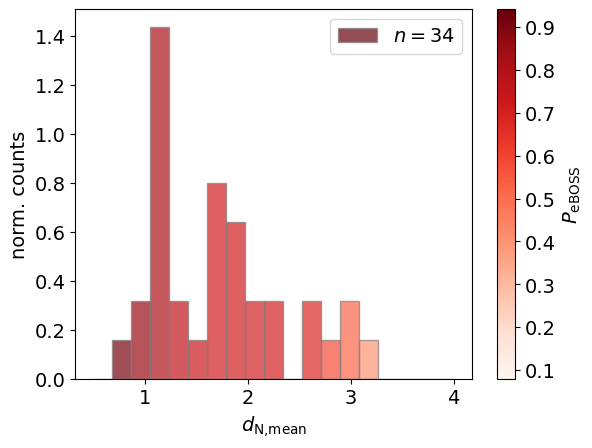

In [12]:
plt.rcParams.update({'font.size': 14})
bins = np.linspace(0.5, 4, 20)
fig, ax = plt.subplots()
cnts, values, bars = ax.hist(hd_means, bins, edgecolor='grey', density=True, alpha=0.7, label=r'$n={}$'.format(len(hd_means)))
pvalue_sorted = sorted(pvalue,reverse=True)

# Define the colormap and normalization
cmap = plt.cm.Reds
norm = plt.Normalize(vmin=min(pvalue_sorted), vmax=max(pvalue_sorted))

# Loop over each bar to set the facecolor and create a color legend
for cnt, c, bar in zip(cnts, pvalue_sorted, bars):
    bar.set_facecolor(cmap(norm(c)))  # Use the colormap to set facecolor
    #bar.set_label(f'Value: {c:.2f}')  # Add label for legend

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'$P_\text{eBOSS}$')



ax.legend()  # Show legend

plt.xlabel(r'$d_\text{N,mean}$')
plt.ylabel('norm. counts')
#plt.savefig('plots/XShooter_distr_updated.pdf',format='pdf')
plt.show()


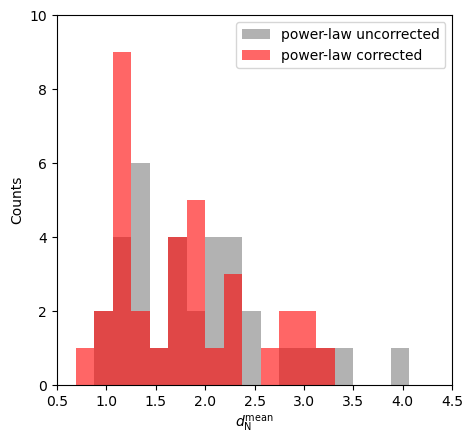

In [16]:
# plt.rcParams.update({'font.size': 14})
# pvalue_uncorr=[]
# for n in names:
#     dmean_trim = np.loadtxt('/media/bartosz/USB STICK/highz_data/eBOSS_NN_trim/mfp_results/{}_NN.txt'.format(n))
#     dmean_trim = dmean_trim[:,1]

#     # Kernel Density Estimation
#     # eBOSS
#     kernel = gaussian_kde(dmean_trim, bw_method='scott')

#     # highz index
#     index = np.where(hnn_id == n)

#     # highz distance
#     d = hd_means[index[0][0]]
#     prob = kernel.integrate_box_1d(d,np.inf)

#     pvalue_uncorr.append(prob)

# high z spectra
hnnfile = np.loadtxt(hpath + 'highZ_NN_corr_lbol10%.txt',dtype='str')
# hnnfile = np.loadtxt(hpath + 'highZ_NN_ext_plclbound.txt',dtype='str')
hnn_id = hnnfile[:,0]
hnn_Ds = hnnfile[:,6:]
hd_means = np.array([np.mean([float(j) for j in nn]) for nn in hnn_Ds])
# # Exclude BAL and reddened quasars
# filter = np.array([x in exc for x in hnn_id])
# hnn_id = hnn_id[~filter]
# hnn_Ds = hnn_Ds[~filter]
# hd_means = hd_means[~filter]



# high z spectra uncorrected
hnnfile_uncorr = np.loadtxt(hpath + 'highZ_NN_uncorr_lbol10%.txt',dtype='str')
# hnnfile_uncorr = np.loadtxt(hpath + 'highZ_NN_uncorr.txt',dtype='str')
hnn_id_uncorr = hnnfile_uncorr[:,0]
hnn_Ds_uncorr = hnnfile_uncorr[:,6:]
hd_means_uncorr = [np.mean([float(j) for j in nn]) for nn in hnn_Ds_uncorr]

bins = np.linspace(0.5, 5, 25)
fig, ax = plt.subplots()
fig.set_figwidth(5.1)
fig.set_figheight(4.8)
cnts_uncorr, values_uncorr, bars_uncorr = ax.hist(hd_means_uncorr, bins, color='grey',edgecolor='None',linewidth=1, 
                                                  histtype='stepfilled',density=False, alpha=0.6, label='power-law uncorrected')
# pvalue_uncorr_sorted = sorted(pvalue_uncorr,reverse=True)

cnts, values, bars = ax.hist(hd_means, bins, color='red', edgecolor='None',histtype='stepfilled',linewidth=1, 
                             density=False, alpha=0.6, label='power-law corrected')
# pvalue_sorted = sorted(pvalue,reverse=True)

ax.legend()  # Show legend
plt.xlim(0.5,4.5)
plt.ylim(0,10)
plt.xlabel(r'$d_\text{N}^\text{mean}$')
plt.ylabel('Counts')
plt.savefig('plots/statistics/XShooter_distr_Lmatched.pdf',bbox_inches='tight')
plt.show()


In [32]:
print(np.prod(pvalue))

8.511716273798129e-20
